In [1]:
# import os
# import json
# import pandas as pd
# import pyarrow.parquet as pq
# import pyarrow as pa
# from tqdm import tqdm
# from pathlib import Path

# # Directory containing the JSON files
# DATA_DIR = "data"
# OUTPUT_DIR = "parquet_database"

# # Progress tracking file
# PROGRESS_FILE = "progress_log.json"
# ERROR_LOG_FILE = "error_log.json"

# # Partition column (e.g., receivedate if available)
# PARTITION_COLUMN = "receivedate"

# def load_progress():
#     """Load progress from log file."""
#     if os.path.exists(PROGRESS_FILE):
#         with open(PROGRESS_FILE, "r") as f:
#             return json.load(f)
#     return {"processed_files": [], "processed_size": 0}

# def save_progress(progress):
#     """Save progress to log file."""
#     with open(PROGRESS_FILE, "w") as f:
#         json.dump(progress, f)

# def log_error(file_path, error_message):
#     """Log errors to the error log file."""
#     error_log = []
#     if os.path.exists(ERROR_LOG_FILE):
#         with open(ERROR_LOG_FILE, "r") as f:
#             error_log = json.load(f)
#     error_log.append({"file": file_path, "error": error_message})
#     with open(ERROR_LOG_FILE, "w") as f:
#         json.dump(error_log, f, indent=4)

# def get_total_size_and_files(data_dir):
#     """Get total size and list of all JSON files."""
#     total_size = 0
#     all_files = []
#     for root, _, files in os.walk(data_dir):
#         for file in files:
#             if file.endswith(".json"):
#                 full_path = os.path.join(root, file)
#                 total_size += os.path.getsize(full_path)
#                 all_files.append(full_path)
#     return total_size, all_files

# def process_file_to_dataframe(file_path):
#     """Process a single JSON file into a Pandas DataFrame."""
#     with open(file_path, "r") as f:
#         data = json.load(f)
        
#         # Flatten JSON into a Pandas DataFrame
#         if isinstance(data, list):
#             df = pd.json_normalize(data)
#         elif isinstance(data, dict) and "results" in data:
#             df = pd.json_normalize(data["results"])
#         else:
#             df = pd.json_normalize([data])  # Single record
#         return df

# def save_to_parquet(df, output_dir, partition_column=None):
#     """Save DataFrame to Parquet with optional partitioning."""
#     table = pa.Table.from_pandas(df)
#     pq.write_to_dataset(
#         table,
#         root_path=output_dir,
#         partition_cols=[partition_column] if partition_column else None,
#         existing_data_behavior="overwrite_or_ignore"
#     )

# def main():
#     os.makedirs(OUTPUT_DIR, exist_ok=True)

#     # Load progress
#     progress = load_progress()

#     # Get total size and list of files
#     total_size, all_files = get_total_size_and_files(DATA_DIR)
#     processed_size = progress["processed_size"]
#     processed_files = set(progress["processed_files"])

#     print(f"Total files: {len(all_files)}, Total size: {total_size / (1024 ** 3):.2f} GB")

#     # Initialize progress bar
#     with tqdm(total=total_size, initial=processed_size, unit="B", unit_scale=True, desc="Processing JSONs") as pbar:
#         for file_path in all_files:
#             file_name = Path(file_path).name

#             if file_name in processed_files:
#                 continue  # Skip already processed files

#             try:
#                 # Convert JSON to Pandas DataFrame
#                 df = process_file_to_dataframe(file_path)

#                 # Save to partitioned Parquet
#                 save_to_parquet(df, OUTPUT_DIR, partition_column=PARTITION_COLUMN)

#                 file_size = os.path.getsize(file_path)
#                 processed_size += file_size
#                 processed_files.add(file_name)

#                 # Update progress
#                 progress["processed_size"] = processed_size
#                 progress["processed_files"] = list(processed_files)
#                 save_progress(progress)

#                 pbar.update(file_size)
#             except Exception as e:
#                 error_message = str(e)
#                 log_error(file_path, error_message)
#                 print(f"Error processing {file_path}: {error_message}")

#     # Verify completion
#     completion_percentage = len(processed_files) / len(all_files) * 100
#     print(f"Processing complete! {completion_percentage:.2f}% of files have been converted to Parquet.")
#     if len(processed_files) < len(all_files):
#         print(f"Missing files: {len(all_files) - len(processed_files)}")

# if __name__ == "__main__":
#     main()


In [33]:
# import os
# import json
# from pathlib import Path

# # Directories and progress file
# OUTPUT_DIR = "parquet_data"
# PROGRESS_FILE = "progress_log.json"

# def delete_parquet_files(output_dir):
#     """Delete all Parquet files in the output directory."""
#     if os.path.exists(output_dir):
#         for root, _, files in os.walk(output_dir):
#             for file in files:
#                 if file.endswith(".parquet"):
#                     file_path = os.path.join(root, file)
#                     try:
#                         os.remove(file_path)
#                         print(f"Deleted: {file_path}")
#                     except Exception as e:
#                         print(f"Error deleting {file_path}: {e}")
#         print(f"All Parquet files in '{output_dir}' have been deleted.")
#     else:
#         print(f"Output directory '{output_dir}' does not exist.")

# def reset_progress(progress_file):
#     """Reset the progress log file."""
#     if os.path.exists(progress_file):
#         try:
#             os.remove(progress_file)
#             print(f"Progress log '{progress_file}' has been deleted.")
#         except Exception as e:
#             print(f"Error deleting progress log '{progress_file}': {e}")
#     else:
#         print(f"Progress log '{progress_file}' does not exist.")

# def main():
#     # Delete all Parquet files
#     delete_parquet_files(OUTPUT_DIR)

#     # Reset progress log
#     reset_progress(PROGRESS_FILE)

# if __name__ == "__main__":
#     main()


In [1]:
import dask.dataframe as dd

# Load the consolidated Parquet dataset
df = dd.read_parquet("parquet_database")

# Count total records
total_records = len(df)
print(f"Total records: {total_records}")


Total records: 6322335


In [2]:
import pyarrow.parquet as pq

# Inspect schema of a single file
schema = pq.read_schema('parquet_database/receivedate=1989-12/d6b1934e8fb147998a644a3f49ddf8b7-0.parquet')
print(schema)

safetyreportversion: string
safetyreportid: string
primarysourcecountry: string
occurcountry: string
transmissiondateformat: string
transmissiondate: string
serious: string
seriousnessother: string
receivedateformat: string
receiptdateformat: string
receiptdate: string
fulfillexpeditecriteria: string
companynumb: string
duplicate: string
reportduplicate.duplicatesource: string
reportduplicate.duplicatenumb: string
primarysource.reportercountry: string
primarysource.qualification: string
sender.sendertype: string
sender.senderorganization: string
receiver.receivertype: string
receiver.receiverorganization: string
patient.reaction: list<element: struct<reactionmeddrapt: string, reactionmeddraversionpt: string, reactionoutcome: string>>
  child 0, element: struct<reactionmeddrapt: string, reactionmeddraversionpt: string, reactionoutcome: string>
      child 0, reactionmeddrapt: string
      child 1, reactionmeddraversionpt: string
      child 2, reactionoutcome: string
patient.drug: list<

In [3]:
import duckdb

# Connect to DuckDB
conn = duckdb.connect()

# Inspect schema of the Parquet dataset
schema = conn.execute("""
    DESCRIBE SELECT * FROM parquet_scan('parquet_database/*/*.parquet', union_by_name=True)
""").fetchdf()

print(schema)


                                    column_name  \
0                                safetyreportid   
1                        transmissiondateformat   
2                              transmissiondate   
3                                       serious   
4                             receivedateformat   
5                             receiptdateformat   
6                                   receiptdate   
7                       fulfillexpeditecriteria   
8                                   companynumb   
9                                      receiver   
10                primarysource.reportercountry   
11                  primarysource.qualification   
12                    sender.senderorganization   
13                             patient.reaction   
14                                 patient.drug   
15                      patient.patientonsetage   
16                  patient.patientonsetageunit   
17                        patient.patientweight   
18                           pa

In [4]:
import pyarrow as pa
import pyarrow.parquet as pq
import os

# Directory for Parquet files
PARQUET_DIR = "parquet_database"

# Define a minimal schema for alignment
base_fields = [
    pa.field("reactionmeddrapt", pa.string()),
    pa.field("reactionmeddraversionpt", pa.string()),
    pa.field("reactionoutcome", pa.string()),
    pa.field("receivedate", pa.string()),
    pa.field("patientsex", pa.string())
]
unified_schema = pa.schema(base_fields)

# Align Parquet files to the unified schema
for root, _, files in os.walk(PARQUET_DIR):
    for file in files:
        if file.endswith(".parquet"):
            file_path = os.path.join(root, file)
            table = pq.read_table(file_path)

            # Add missing columns dynamically
            for field in unified_schema:
                if field.name not in table.schema.names:
                    table = table.append_column(field.name, pa.array([None] * len(table)))

            # Write back with the aligned schema
            pq.write_table(table, file_path)


In [ ]:
#above content is same as mongodb experiment

In [65]:
# import duckdb

# # Connect to DuckDB
# conn = duckdb.connect()

# # Query the schema of the Parquet dataset
# result = conn.execute("""
#     SELECT * FROM parquet_scan('parquet_database/*/*.parquet') LIMIT 1
# """).fetchdf()

# print("Schema:")
# print(result.dtypes)


In [67]:
# result = conn.execute("PRAGMA show_tables").fetchall()
# print("Tables:", result)


In [18]:
# # Fetch a small sample of the dataset
# sample = conn.execute("SELECT * FROM parquet_scan('parquet_database/*/*.parquet') LIMIT 5").fetchdf()
# print(sample)


In [20]:
# total_records = conn.execute("SELECT COUNT(*) FROM parquet_scan('parquet_database/*/*.parquet')").fetchone()[0]
# print(f"Total records: {total_records}")


In [22]:
# result = conn.execute("""
#     SELECT receiptdate, COUNT(*) as record_count
#     FROM parquet_scan('parquet_database/*/*.parquet')
#     GROUP BY receiptdate
#     ORDER BY receiptdate
# """).fetchdf()

# print(result)


In [24]:
# result = conn.execute("""
#     SELECT *
#     FROM parquet_scan('parquet_database/*/*.parquet')
#     WHERE receiptdate = '20040317'
#     LIMIT 10
# """).fetchdf()

# print(result)


In [26]:
import dask.dataframe as dd

# Load the partitioned Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Display schema (column names and types)
print("Schema:")
print(df.dtypes)

# Show sample rows (convert to Pandas to display)
print("Sample Rows:")
print(df.head(5))


Schema:
safetyreportid                                 string[pyarrow]
transmissiondateformat                         string[pyarrow]
transmissiondate                               string[pyarrow]
serious                                        string[pyarrow]
receivedateformat                              string[pyarrow]
receiptdateformat                              string[pyarrow]
receiptdate                                    string[pyarrow]
fulfillexpeditecriteria                        string[pyarrow]
companynumb                                    string[pyarrow]
receiver                                               float64
primarysource.reportercountry                  string[pyarrow]
primarysource.qualification                    string[pyarrow]
sender.senderorganization                      string[pyarrow]
patient.reaction                                        object
patient.drug                                            object
patient.patientonsetage                        

/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/core.py:8153: UserWarning: Insufficient elements for `head`. 5 elements requested, only 1 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


In [27]:
import dask.dataframe as dd

# Load the Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Show schema (column names and types)
print("Schema:")
print(df.dtypes)


Schema:
safetyreportid                                 string[pyarrow]
transmissiondateformat                         string[pyarrow]
transmissiondate                               string[pyarrow]
serious                                        string[pyarrow]
receivedateformat                              string[pyarrow]
receiptdateformat                              string[pyarrow]
receiptdate                                    string[pyarrow]
fulfillexpeditecriteria                        string[pyarrow]
companynumb                                    string[pyarrow]
receiver                                               float64
primarysource.reportercountry                  string[pyarrow]
primarysource.qualification                    string[pyarrow]
sender.senderorganization                      string[pyarrow]
patient.reaction                                        object
patient.drug                                            object
patient.patientonsetage                        

In [28]:
# 1. Count Total Reports Over Time (OLAP)

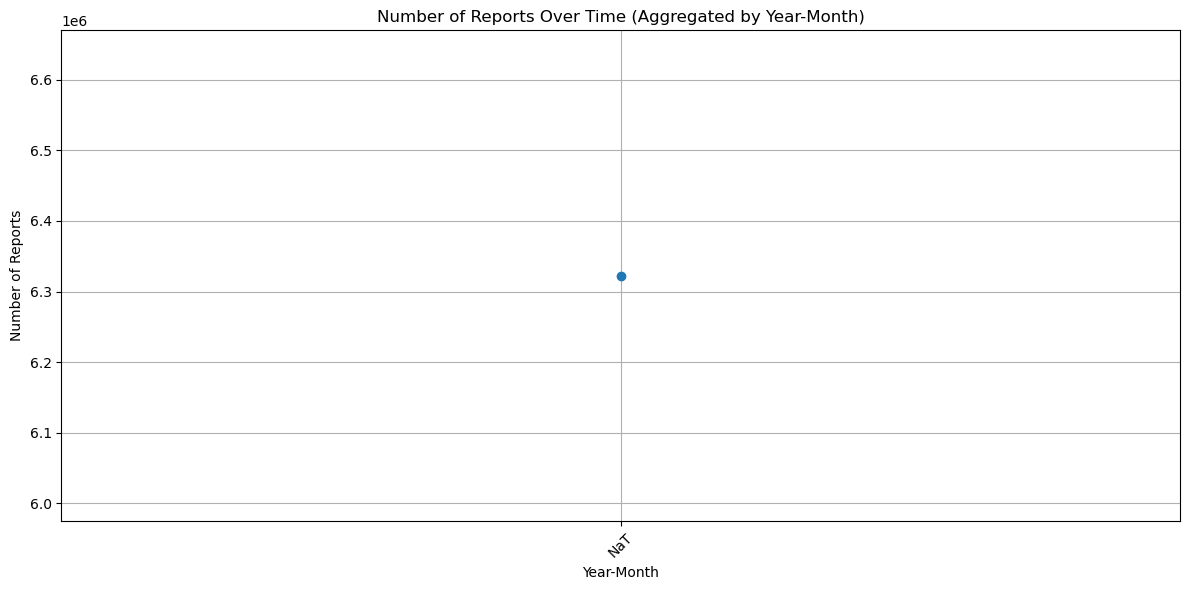

In [40]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Add Year-Month column
df["YearMonth"] = (
    dd.to_datetime(df["receivedate"], format="%Y%m%d", errors="coerce")
    .dt.to_period("M")
    .astype(str)  # Convert to 'YYYY-MM' format
)

# Group by Year-Month and count records
reports_over_time = (
    df.groupby("YearMonth").size().to_frame("count").reset_index()  # Convert Series to DataFrame
)

# Convert to Pandas for plotting
reports_over_time_pd = reports_over_time.compute()

# Sort by YearMonth for proper plotting
reports_over_time_pd = reports_over_time_pd.sort_values("YearMonth")

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(reports_over_time_pd["YearMonth"], reports_over_time_pd["count"], marker='o')
plt.xlabel("Year-Month")
plt.ylabel("Number of Reports")
plt.title("Number of Reports Over Time (Aggregated by Year-Month)")
plt.xticks(rotation=45, ticks=reports_over_time_pd["YearMonth"][::12])  # Show only yearly ticks
plt.grid()
plt.tight_layout()
plt.show()


In [41]:
# 2. Top 10 Most Common Reactions

In [42]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Explode the `patient.reaction` array
reactions_exploded = df.explode("patient.reaction")

# Extract the `reactionmeddrapt` field
reactions_extracted = reactions_exploded["patient.reaction"].dropna().map(lambda x: x.get("reactionmeddrapt"))

# Count occurrences of each reaction
reaction_counts = reactions_extracted.value_counts().compute()

# Get the top 10 most common reactions
top_10_reactions = reaction_counts.nlargest(10)

# Convert to Pandas for plotting
top_10_reactions_pd = top_10_reactions.reset_index()
top_10_reactions_pd.columns = ["reactionmeddrapt", "count"]

# Plot the results using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_10_reactions_pd["reactionmeddrapt"], top_10_reactions_pd["count"], color='skyblue')
plt.xlabel("Count")
plt.ylabel("Reaction")
plt.title("Top 10 Most Common Reactions")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


ValueError: Metadata inference failed in `map`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
AttributeError("'str' object has no attribute 'get'")

Traceback:
---------
  File "/opt/anaconda3/lib/python3.12/site-packages/dask/dataframe/utils.py", line 195, in raise_on_meta_error
    yield
  File "/opt/anaconda3/lib/python3.12/site-packages/dask_expr/_expr.py", line 4025, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/dask/utils.py", line 1241, in __call__
    return getattr(__obj, self.method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/series.py", line 4700, in map
    new_values = self._map_values(arg, na_action=na_action)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/base.py", line 921, in _map_values
    return algorithms.map_array(arr, mapper, na_action=na_action, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/algorithms.py", line 1743, in map_array
    return lib.map_infer(values, mapper, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "lib.pyx", line 2972, in pandas._libs.lib.map_infer
  File "/var/folders/1s/991tybk51zndg1yc51wjq1v80000gn/T/ipykernel_88031/3695776965.py", line 11, in <lambda>
    reactions_extracted = reactions_exploded["patient.reaction"].dropna().map(lambda x: x.get("reactionmeddrapt"))
                                                                                        ^^^^^


In [ ]:
# 3. Top 10 Drugs by Count


In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Explode the `patient.drug` array
drugs_exploded = df.explode("patient.drug")

# Extract the `medicinalproduct` field
drugs_extracted = drugs_exploded["patient.drug"].dropna().map(lambda x: x.get("medicinalproduct"))

# Count occurrences of each drug
drug_counts = drugs_extracted.value_counts().compute()

# Get the top 10 most common drugs
top_10_drugs = drug_counts.nlargest(10)

# Convert to Pandas for plotting
top_10_drugs_pd = top_10_drugs.reset_index()
top_10_drugs_pd.columns = ["medicinalproduct", "count"]

# Plot the results using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_10_drugs_pd["medicinalproduct"], top_10_drugs_pd["count"], color='lightcoral')
plt.xlabel("Count")
plt.ylabel("Drug")
plt.title("Top 10 Most Common Drugs")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


In [ ]:
# 4. Distribution of Seriousness


In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load the Parquet dataset
df = dd.read_parquet("parquet_database", engine="pyarrow")

# Group by `serious` column and count occurrences
seriousness_distribution = (
    df.groupby("serious")
    .size()
    .reset_index(name="count")
    .compute()
)

# Map seriousness levels to meaningful labels
seriousness_distribution["serious_label"] = seriousness_distribution["serious"].map({1: "Low", 2: "High"})

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(seriousness_distribution["serious"], seriousness_distribution["count"], color='steelblue')

# Customize x-axis labels
plt.xticks(ticks=seriousness_distribution["serious"], labels=seriousness_distribution["serious_label"])

# Add axis labels and title
plt.xlabel("Seriousness Level")
plt.ylabel("Count")
plt.title("Distribution of Seriousness")

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# 5. Reaction Trends Over Time


In [ ]:
from pyspark.sql.functions import col, explode, year, month, concat_ws
import matplotlib.pyplot as plt

# Aggregate by Year-Month
df = df.withColumn("YearMonth", concat_ws("-", year(col("receivedate")), month(col("receivedate"))))

# Explode `patient.reaction` and group by YearMonth
reaction_trends = (
    df.select(col("YearMonth"), explode(col("`patient.reaction`")).alias("reaction"))
    .groupBy("YearMonth", "reaction.reactionmeddrapt")  # Group by YearMonth and reaction
    .count()
    .orderBy("YearMonth")
)

# Convert to Pandas for further analysis
reaction_trends_pd = reaction_trends.toPandas()

# Focus on top N reactions globally
top_reactions = (
    reaction_trends_pd.groupby("reactionmeddrapt")["count"].sum().nlargest(5).index
)
reaction_trends_filtered = reaction_trends_pd[
    reaction_trends_pd["reactionmeddrapt"].isin(top_reactions)
]

# Pivot for visualization
reaction_pivot = reaction_trends_filtered.pivot(
    index="YearMonth", columns="reactionmeddrapt", values="count"
).fillna(0)

# Plot top reactions
plt.figure(figsize=(14, 7))
for reaction in reaction_pivot.columns:
    plt.plot(reaction_pivot.index, reaction_pivot[reaction], label=reaction)

# Customize the plot
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("Reaction Trends Over Time (Aggregated by Year-Month)")
plt.legend(title="Reactions", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(rotation=45)

# Ensure layout is tight for better display
plt.tight_layout()
plt.show()


In [ ]:
# 4. Patient Sex Distribution


In [165]:
print(patient_sex_counts_pd.columns)


Index(['patient.patientsex', 'count'], dtype='object')


In [63]:
# Group by patientsex and count
patient_sex_counts = df.groupBy(col("`patient.patientsex`")).count()

# Convert to Pandas for visualization
patient_sex_counts_pd = patient_sex_counts.toPandas()

# Fix column names in the Pandas DataFrame
labels = patient_sex_counts_pd["patient.patientsex"]
sizes = patient_sex_counts_pd["count"]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Patient Sex")
plt.show()



ConnectionRefusedError: [Errno 61] Connection refused

In [145]:
# 5. Average Age of Patients by Reaction


In [1]:
from pyspark.sql.functions import col, explode, avg, when

# Normalize patient age based on patientonsetageunit
df = df.withColumn(
    "normalized_age",
    when(col("`patient.patientonsetageunit`") == "801", col("`patient.patientonsetage`").cast("double"))  # Years
    .when(col("`patient.patientonsetageunit`") == "802", col("`patient.patientonsetage`").cast("double") / 12)  # Months -> years
    .when(col("`patient.patientonsetageunit`") == "803", col("`patient.patientonsetage`").cast("double") / 365)  # Days -> years
    .otherwise(None)
)

# Calculate average age for each reaction type
avg_age_by_reaction = (
    df.select(
        explode(col("`patient.reaction`")).alias("reaction"),  # Explode reaction array
        col("normalized_age").alias("patientonsetage")
    )
    .groupBy("reaction.reactionmeddrapt")
    .agg(avg("patientonsetage").alias("avg_age"))
    .orderBy("avg_age", ascending=False)
    .limit(10)
)

# Convert to Pandas for visualization
avg_age_by_reaction_pd = avg_age_by_reaction.toPandas()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(avg_age_by_reaction_pd["reactionmeddrapt"], avg_age_by_reaction_pd["avg_age"])
plt.xlabel("Average Age")
plt.ylabel("Reaction")
plt.title("Top 10 Reactions by Average Patient Age")
plt.gca().invert_yaxis()
plt.show()


NameError: name 'df' is not defined

In [181]:
df.printSchema()


root
 |-- safetyreportid: string (nullable = true)
 |-- transmissiondateformat: string (nullable = true)
 |-- transmissiondate: string (nullable = true)
 |-- serious: string (nullable = true)
 |-- receivedateformat: string (nullable = true)
 |-- receiptdateformat: string (nullable = true)
 |-- receiptdate: string (nullable = true)
 |-- fulfillexpeditecriteria: string (nullable = true)
 |-- companynumb: string (nullable = true)
 |-- receiver: double (nullable = true)
 |-- primarysource.reportercountry: string (nullable = true)
 |-- primarysource.qualification: string (nullable = true)
 |-- sender.senderorganization: string (nullable = true)
 |-- patient.patientsex: string (nullable = true)
 |-- patient.reaction: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- reactionmeddrapt: string (nullable = true)
 |    |    |-- reactionmeddraversionpt: string (nullable = true)
 |    |    |-- reactionoutcome: string (nullable = true)
 |-- patient.drug: array (n

In [159]:
# 6. Seriousness Impact on Deaths


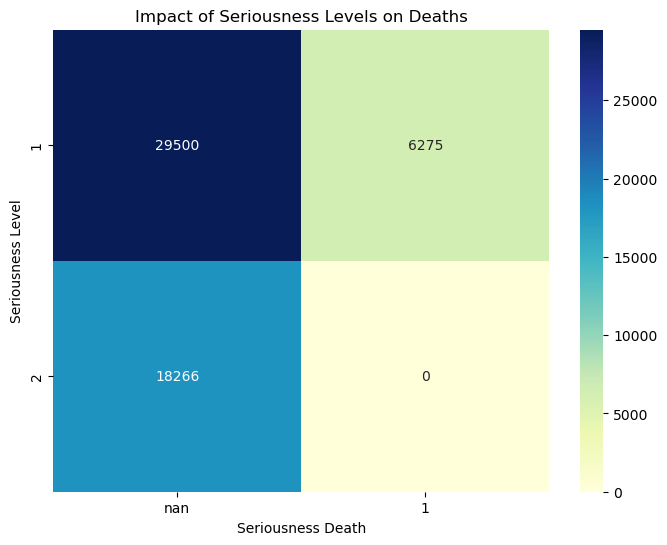

In [149]:
# Group by seriousness and seriousnessdeath
seriousness_impact = (
    df.groupBy("serious", "seriousnessdeath")
    .count()
    .orderBy("serious", "seriousnessdeath")
)

# Convert to Pandas for visualization
seriousness_impact_pd = seriousness_impact.toPandas()

# Pivot for heatmap visualization
import seaborn as sns

seriousness_pivot = seriousness_impact_pd.pivot(index="serious", columns="seriousnessdeath", values="count").fillna(0)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(seriousness_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Impact of Seriousness Levels on Deaths")
plt.xlabel("Seriousness Death")
plt.ylabel("Seriousness Level")
plt.show()


In [157]:
df.printSchema()


root
 |-- safetyreportid: string (nullable = true)
 |-- transmissiondateformat: string (nullable = true)
 |-- transmissiondate: string (nullable = true)
 |-- serious: string (nullable = true)
 |-- receivedateformat: string (nullable = true)
 |-- receiptdateformat: string (nullable = true)
 |-- receiptdate: string (nullable = true)
 |-- fulfillexpeditecriteria: string (nullable = true)
 |-- companynumb: string (nullable = true)
 |-- receiver: double (nullable = true)
 |-- primarysource.reportercountry: string (nullable = true)
 |-- primarysource.qualification: string (nullable = true)
 |-- sender.senderorganization: string (nullable = true)
 |-- patient.patientsex: string (nullable = true)
 |-- patient.reaction: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- reactionmeddrapt: string (nullable = true)
 |    |    |-- reactionmeddraversionpt: string (nullable = true)
 |    |    |-- reactionoutcome: string (nullable = true)
 |-- patient.drug: array (n

In [49]:
# %pip install duckdb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [51]:
# import duckdb

# # Check DuckDB version
# print(duckdb.__version__)

1.1.3


In [17]:
import sys
sys.executable #base env

'/opt/anaconda3/bin/python'

In [19]:
!which python
!which java
!echo $JAVA_HOME

/opt/anaconda3/bin/python
/opt/anaconda3/envs/bigdata/lib/jvm/bin/java
/opt/anaconda3/envs/bigdata/lib/jvm


In [21]:
import pyspark
print(f"Spark version: {pyspark.__version__}")


Spark version: 3.5.3
